In [1]:
cd /lustre/aginsbur/orion/2016.1.00165.S/imaging

/lustre/aginsbur/orion/2016.1.00165.S/imaging


In [2]:
ls *FullField*.image.pbcor.fits

OrionFullField.b3.spw0,4.29SiOv=0_2-1.clarkclean1000.image.pbcor.fits
OrionFullField.b3.spw0,4.29SiOv=2_2-1.clarkclean1000.image.pbcor.fits
OrionFullField.b3.spw0,4.SiOv=0_2-1.clarkclean1000.image.pbcor.fits
OrionFullField.b3.spw0,4.SiOv=1_2-1.clarkclean1000.image.pbcor.fits
OrionFullField.b3.spw0,4.SO2_2-1_1.clarkclean1000.image.pbcor.fits
OrionFullField.b3.spw2,6.SO3_2-2_1.clarkclean1000.image.pbcor.fits
OrionFullField.b3.spw2,6.SOv=1_3_2-2_1.clarkclean1000.image.pbcor.fits
OrionFullField.b6.spw1.H30a.clarkclean1000.image.pbcor.fits
OrionFullField.b6.spw2.29SiOv=0_5-4.clarkclean1000.image.pbcor.fits
OrionFullField.b6.spw2.SiOv=1_5-4.clarkclean1000.image.pbcor.fits
OrionFullField.b6.spw3.SiOv=0_5-4.clarkclean1000.image.pbcor.fits
OrionFullField.b6.spw3.SiS_12-11.clarkclean1000.image.pbcor.fits


In [3]:
%matplotlib inline

In [4]:
import warnings
import astropy
warnings.filterwarnings('ignore')

In [5]:
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', module="astropy.wcs")

In [6]:
from spectral_cube import SpectralCube

In [7]:
cube = SpectralCube.read('OrionSourceI.b3.spw0,4.SiOv=1_2-1.clarkclean1000.image.pbcor.fits')

In [8]:
from astropy import units as u
from astropy import coordinates

In [9]:
bn = coordinates.SkyCoord('5:35:14.1058 -5:22:22.645', frame='icrs', unit=(u.hour,u.deg))
sourceI = coordinates.SkyCoord("5:35:14.519", "-5:22:30.633", frame='fk5', unit=(u.hour, u.deg))

In [10]:
cube.with_spectral_unit(u.km/u.s, velocity_convention='radio')

VaryingResolutionSpectralCube with shape=(20, 3840, 3840) and unit=Jy / beam:
 n_x:   3840  type_x: RA---SIN  unit_x: deg    range:    83.799754 deg:   83.821176 deg
 n_y:   3840  type_y: DEC--SIN  unit_y: deg    range:    -5.385822 deg:   -5.364494 deg
 n_s:     20  type_s: VRAD      unit_s: km / s  range:       40.000 km / s:     104.380 km / s

In [11]:
cube

VaryingResolutionSpectralCube with shape=(20, 3840, 3840) and unit=Jy / beam:
 n_x:   3840  type_x: RA---SIN  unit_x: deg    range:    83.799754 deg:   83.821176 deg
 n_y:   3840  type_y: DEC--SIN  unit_y: deg    range:    -5.385822 deg:   -5.364494 deg
 n_s:     20  type_s: FREQ      unit_s: Hz     range: 86369917818.330 Hz:86388472024.870 Hz

In [ ]:
mx = cube.max(axis=0, how='slice')
m0 = cube.moment0(axis=0, how='slice')

INFO: Auto-setting vmin to -3.283e-04 [aplpy.core]
INFO: Auto-setting vmax to  7.557e-03 [aplpy.core]


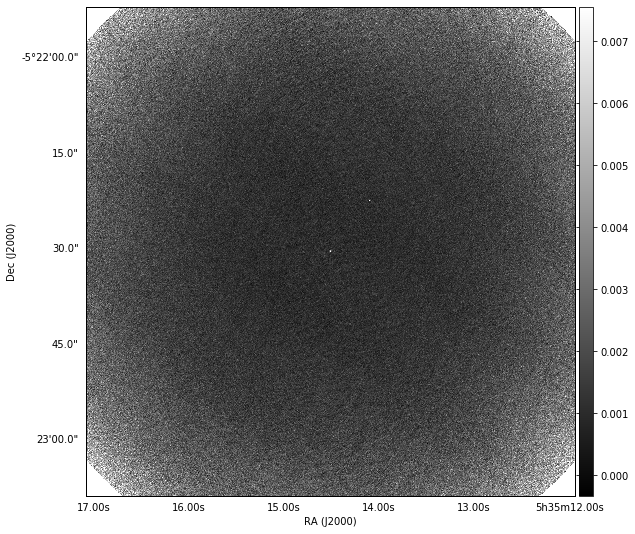

In [ ]:
mx.quicklook()

INFO: Auto-setting vmin to -3.058e+04 [aplpy.core]
INFO: Auto-setting vmax to  3.220e+04 [aplpy.core]


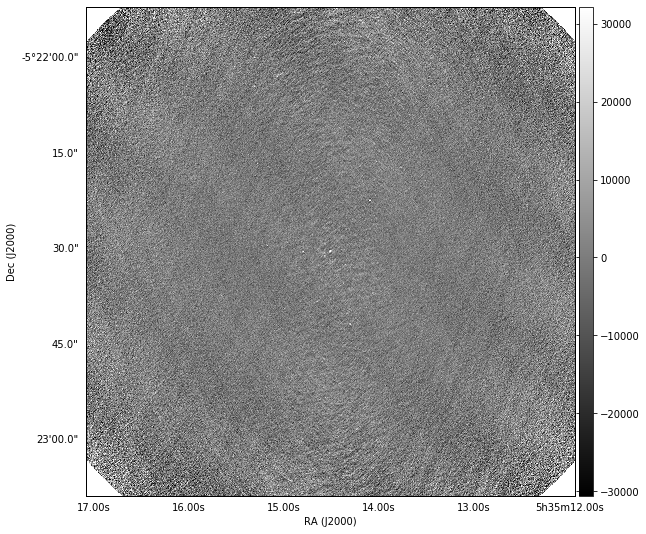

In [ ]:
m0.quicklook()

INFO: Auto-setting vmin to -3.524e-04 [aplpy.core]
INFO: Auto-setting vmax to  5.689e-03 [aplpy.core]


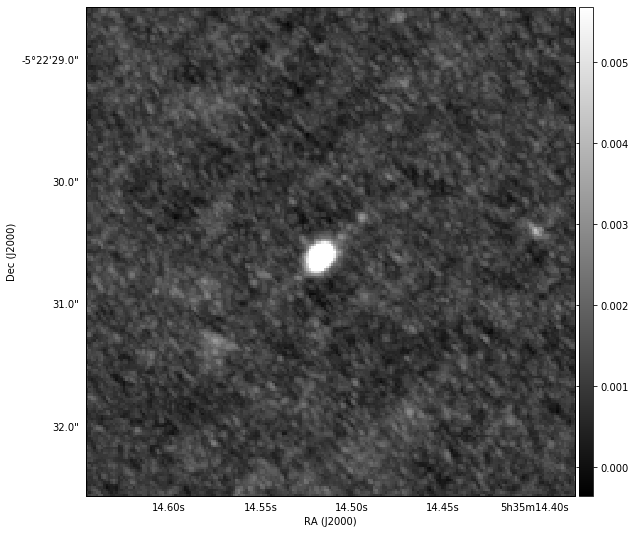

In [ ]:
mx[1920-100:1920+100,1920-100:1920+100].quicklook()

INFO: Auto-setting vmin to -2.204e+04 [aplpy.core]
INFO: Auto-setting vmax to  8.864e+04 [aplpy.core]


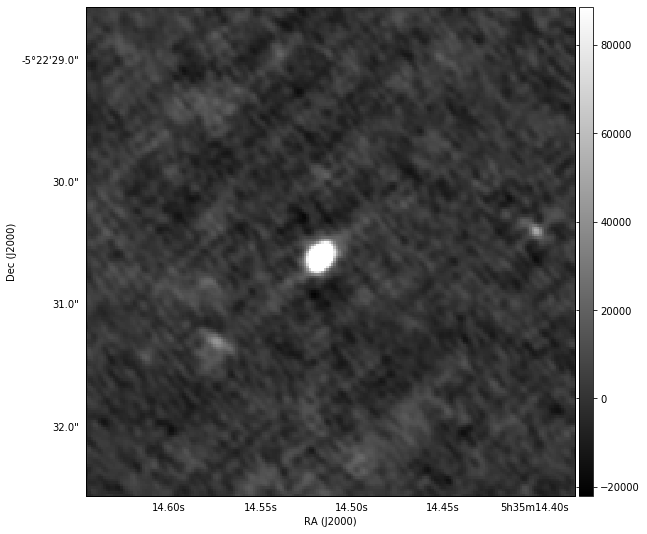

In [ ]:
m0[1920-100:1920+100,1920-100:1920+100].quicklook()

INFO: Auto-setting vmin to -6.527e+04 [aplpy.core]
INFO: Auto-setting vmax to  5.338e+05 [aplpy.core]


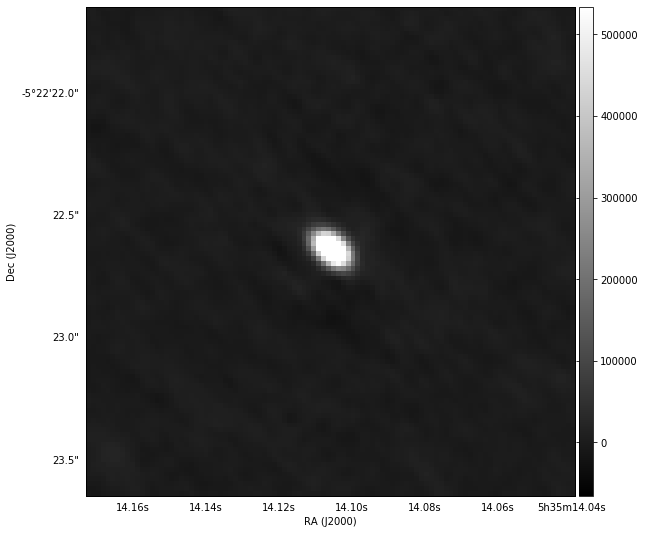

In [ ]:
m0[2316-50:2316+50,2223-50:2223+50].quicklook()

In [ ]:
import glob

In [ ]:
import pylab as pl

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
for fn in glob.glob("*FullField*.image.pbcor.fits"):
    print(fn)
    cube = SpectralCube.read(fn).with_spectral_unit(u.km/u.s, velocity_convention='radio')
    minval = cube.min(axis=0, how='slice')
    #cube.allow_huge_operations=True
    #scube = (cube - minval)
    mx = cube.max(axis=0, how='slice')
    m0 = cube.moment0(axis=0, how='slice')
    (mx-minval).quicklook()
    pl.gca().set_title(f"{fn} mx-min")
    mx.quicklook()
    pl.gca().set_title(f"{fn} mx")
    m0.quicklook()
    pl.gca().set_title(f"{fn} m0")

OrionFullField.b6.spw3.SiS_12-11.clarkclean1000.image.pbcor.fits


In [ ]:
print("DONE")